## Beskrivelse av Plotting av data

Denne Jupyter Notebook inneholder flere seksjoner som analyserer og visualiserer miljødata fra ulike kilder som temperatur, nedbør, vindhastighet og luftfuktighet. Her er en oversikt over hva koden gjør:

---

### 1. **Importering av nødvendige biblioteker**
Koden starter med å importere nødvendige biblioteker for dataanalyse, maskinlæring og visualisering:
- `matplotlib.pyplot` og `plotly.graph_objects` for plotting.
- `pandas` for datahåndtering.
- `sklearn` for maskinlæringsmodeller og dataskalering.

---

### 2. **Analyse, visualisering og forecasting av temperaturdata**
- **Lese data**: Temperaturdata lastes inn fra en CSV-fil.
- **Dataprosessering**:
  - Konverterer `referenceTime` til datetime-format.
  - Fjerner rader med ugyldige tidsverdier.
- **Maskinlæring**:
  - Data splittes i trenings- og testsett.
  - Data skaleres med `StandardScaler`.
  - En lineær regresjonsmodell trenes og brukes til å predikere temperaturverdier.
- **Visualisering**:
  - Faktiske verdier og prediksjoner plottes med `matplotlib`.
  - Feil mellom faktiske og predikerte verdier vises som stiplete linjer.
  - Gjennomsnittlig absolutt feil (MAE) og R²-verdi beregnes og skrives ut.

---

### 3. **Visualisering av temperatur, nedbør, vindhastighet og luftfuktighet**
- **Gruppere data**: Nedbørsdata grupperes månedlig for å redusere antall søyler i plottet.
- **Visualisering**:
  - Bruker `plotly.graph_objects` for å lage et stolpediagram.
  - Gjennomsnittlig og median nedbør vises som stiplete linjer i plottet.

---

### Viktige beregninger
- **Gjennomsnitt og median**: Beregnes for hver datakilde og brukes i visualiseringene.
- **Feilmålinger**: MAE og R²-verdi brukes for å evaluere modellens ytelse.

---

### Visualiseringsteknikker
- `matplotlib` brukes for å vise faktiske verdier og prediksjoner med feillinjer.
- `plotly` brukes for interaktive grafer som linjediagrammer og stolpediagrammer.

---

Mean Squared Error (MSE) on Test Set: 22.404


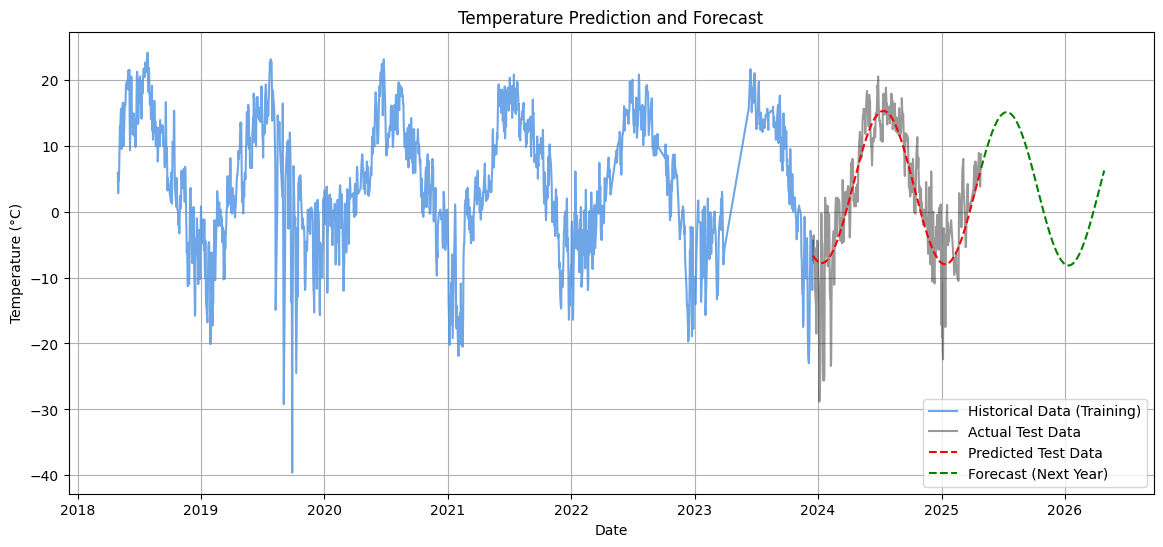

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load temperature data
temperature_data = pd.read_csv("../data/temperature_data.csv")

# Convert referenceTime to datetime
temperature_data['referenceTime'] = pd.to_datetime(temperature_data['referenceTime'], errors='coerce')

# Drop rows with invalid datetime values
temperature_data = temperature_data.dropna(subset=['referenceTime'])

# Feature Engineering: Add day count and seasonality features
temperature_data['Day'] = (temperature_data['referenceTime'] - temperature_data['referenceTime'].min()).dt.days
temperature_data['Sin_Day'] = np.sin(2 * np.pi * temperature_data['Day'] / 365)
temperature_data['Cos_Day'] = np.cos(2 * np.pi * temperature_data['Day'] / 365)

# Split into training and testing sets
train_size = int(0.8 * len(temperature_data))
train = temperature_data.iloc[:train_size]
test = temperature_data.iloc[train_size:]

X_train = train[['Day', 'Sin_Day', 'Cos_Day']]
y_train = train['value']

X_test = test[['Day', 'Sin_Day', 'Cos_Day']]
y_test = test['value']

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse:.3f}")

# Generate future dates for the next year
future_days = 365
last_day = temperature_data['referenceTime'].max()
future_dates = pd.date_range(start=last_day + pd.Timedelta(days=1), periods=future_days)

# Create a DataFrame for future dates
future_data = pd.DataFrame({'referenceTime': future_dates})
future_data['Day'] = (future_data['referenceTime'] - temperature_data['referenceTime'].min()).dt.days
future_data['Sin_Day'] = np.sin(2 * np.pi * future_data['Day'] / 365)
future_data['Cos_Day'] = np.cos(2 * np.pi * future_data['Day'] / 365)

# Predict future temperatures
X_future = future_data[['Day', 'Sin_Day', 'Cos_Day']]
future_data['Predicted_Temperature'] = model.predict(X_future)

# Plot the results including the forecast
plt.figure(figsize=(14, 6))

# Plot historical data (training data only) with a warmer blue
plt.plot(train['referenceTime'], y_train, label='Historical Data (Training)', color='#4a90e2', alpha=0.8)

# Plot actual test data
plt.plot(test['referenceTime'], y_test, label='Actual Test Data', color='black', alpha=0.4)

# Plot predicted test data
plt.plot(test['referenceTime'], y_pred, label='Predicted Test Data', linestyle='--', color='red')

# Plot forecast for the next year
plt.plot(future_data['referenceTime'], future_data['Predicted_Temperature'], label='Forecast (Next Year)', linestyle='--', color='green')

# Add title and labels
plt.title('Temperature Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


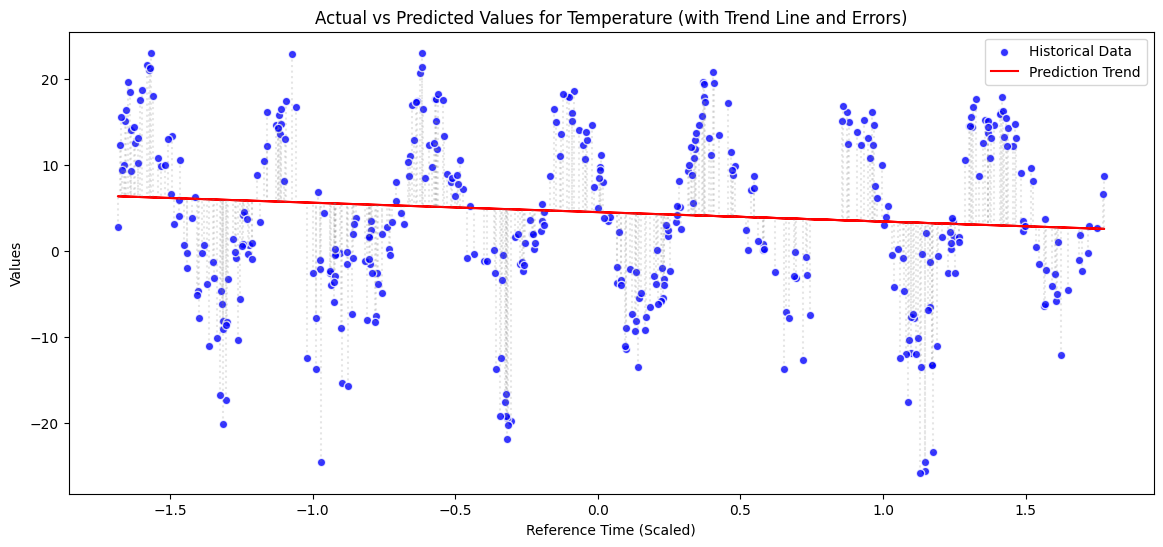

Mean Absolute Error: 8.374663753345077
R-squared: -0.012872600190234174


In [40]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Les inn data
temperature_data = pd.read_csv("../data/temperature_data.csv")

# Konverter referenceTime til datetime
temperature_data['referenceTime'] = pd.to_datetime(temperature_data['referenceTime'], errors='coerce')

# Fjern rader med NaT i referenceTime
temperature_data = temperature_data.dropna(subset=['referenceTime'])

X_regn = temperature_data['referenceTime']
Y_regn = temperature_data['value']

# Splitter dataene i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X_regn, Y_regn, test_size=0.2, random_state=0)

# Omformer dataene til 2D-arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Skalering
scaler = StandardScaler()

# Passerer StandardScaler til dataene og transformerer deretter dataene.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled,X_train_scaled

# KOnverterer de skalerte arrayene tilbake til DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['referenceTime'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['referenceTime'])

# Trene en lineær regresjonsmodell og gjøre prediksjoner på testsettet
regr = LinearRegression()
regr.fit(X_train_scaled_df, y_train)

# Predikere på testsettet
y_pred = regr.predict(X_test_scaled_df)

# Visualiserer prediksjoner vs faktiske verdier
plt.figure(figsize=(14, 6))
plt.scatter(X_test_scaled_df['referenceTime'], y_test, color='blue', label='Historical Data', alpha=0.8,edgecolors='w')
plt.plot(X_test_scaled_df['referenceTime'], y_pred, color='red', label='Prediction Trend')
for i in range(len(X_test_scaled_df)):
    plt.plot([X_test_scaled_df['referenceTime'].iloc[i], X_test_scaled_df['referenceTime'].iloc[i]],
             [y_test.iloc[i], y_pred[i]], color='Gray', linestyle='dotted', alpha=0.2)
plt.title('Actual vs Predicted Values for Temperature (with Trend Line and Errors)')
plt.xlabel('Reference Time (Scaled)')
plt.ylabel('Values')
plt.legend()
plt.show()

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



In [41]:
# Leser data fra de separate CSV-filene
temperature_data = pd.read_csv("../data/temperature_data.csv")
precipitation_data = pd.read_csv("../data/precipitation_data.csv")
wind_speed_data = pd.read_csv("../data/wind_speed_data.csv")
humidity_data = pd.read_csv("../data/humidity_data.csv")

# Konverterer referansetiden til datetime for alle datasettene
temperature_data['referenceTime'] = pd.to_datetime(temperature_data['referenceTime'])
precipitation_data['referenceTime'] = pd.to_datetime(precipitation_data['referenceTime'])
wind_speed_data['referenceTime'] = pd.to_datetime(wind_speed_data['referenceTime'])
humidity_data['referenceTime'] = pd.to_datetime(humidity_data['referenceTime'])

# Plotter temperaturdata
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(
    x=temperature_data['referenceTime'],
    y=temperature_data['value'],
    mode='lines',
    name='Temperatur',
    line=dict(color='#1f77b4')
))
mean_temp = temperature_data['value'].mean()
median_temp = temperature_data['value'].median()
fig_temp.add_trace(go.Scatter(
    x=temperature_data['referenceTime'],
    y=[mean_temp] * len(temperature_data['referenceTime']),
    mode='lines',
    line=dict(dash='dash', color='rgba(31, 119, 180)'),
    name='Gjennomsnittstemperatur'
))
fig_temp.update_layout(
    title=f"Temperatur over tid<br>Gjennomsnitt: {mean_temp:.2f} °C, Median: {median_temp:.2f} °C",
    xaxis_title="Dato",
    yaxis_title="Temperatur (°C)"
)
fig_temp.show()

# Plotter nedbørsdata
fig_precip = go.Figure()
fig_precip.add_trace(go.Bar(
    x=precipitation_data['referenceTime'],
    y=precipitation_data['value'],
    name='Nedbør',
    marker=dict(color='#1f77b4')
))
mean_precip = precipitation_data['value'].mean()
median_precip = precipitation_data['value'].median()
fig_precip.add_trace(go.Scatter(
    x=precipitation_data['referenceTime'],
    y=[mean_precip] * len(precipitation_data['referenceTime']),
    mode='lines',
    line=dict(dash='dash', color='rgba(31, 119, 180)'),
    name='Gjennomsnittsnedbør'
))
fig_precip.update_layout(
    title=f"Nedbør over tid<br>Gjennomsnitt: {mean_precip:.2f} mm, Median: {median_precip:.2f} mm",
    xaxis_title="Dato",
    yaxis_title="Nedbør (mm)"
)
fig_precip.show()

# Plotter vindhastighetsdata
fig_wind = go.Figure()
fig_wind.add_trace(go.Scatter(
    x=wind_speed_data['referenceTime'],
    y=wind_speed_data['value'],
    mode='lines',
    name='Vindhastighet',
    line=dict(color='#1f77b4')
))
mean_wind = wind_speed_data['value'].mean()
median_wind = wind_speed_data['value'].median()
fig_wind.add_trace(go.Scatter(
    x=wind_speed_data['referenceTime'],
    y=[mean_wind] * len(wind_speed_data['referenceTime']),
    mode='lines',
    line=dict(dash='dash', color='rgba(31, 119, 180)'),
    name='Gjennomsnittsvindhastighet'
))
fig_wind.update_layout(
    title=f"Vindhastighet over tid<br>Gjennomsnitt: {mean_wind:.2f} m/s, Median: {median_wind:.2f} m/s",
    xaxis_title="Dato",
    yaxis_title="Vindhastighet (m/s)"
)
fig_wind.show()

# Plotter luftfuktighetsdata
fig_humidity = go.Figure()
fig_humidity.add_trace(go.Scatter(
    x=humidity_data['referenceTime'],
    y=humidity_data['value'],
    mode='lines',
    name='Luftfuktighet',
    line=dict(color='#1f77b4')
))
mean_humidity = humidity_data['value'].mean()
median_humidity = humidity_data['value'].median()
fig_humidity.add_trace(go.Scatter(
    x=humidity_data['referenceTime'],
    y=[mean_humidity] * len(humidity_data['referenceTime']),
    mode='lines',
    line=dict(dash='dash', color='rgba(31, 119, 180)'),
    name='Gjennomsnittlig luftfuktighet'
))
fig_humidity.update_layout(
    title=f"Luftfuktighet over tid<br>Gjennomsnitt: {mean_humidity:.2f} %, Median: {median_humidity:.2f} %",
    xaxis_title="Dato",
    yaxis_title="Relativ luftfuktighet (%)"
)
fig_humidity.show()